In [1]:
!pip install plotly
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../.dev/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../.dev/kaggle/input\company_tickers_exchange.json


Based on https://www.kaggle.com/code/svendaj/extracting-data-from-sec-edgar-restful-apis

In [3]:
import json

with open("../.dev/kaggle/input\company_tickers_exchange.json", "r") as f:
    CIK_dict = json.load(f)

CIK_dict.keys()

dict_keys(['fields', 'data'])

In [4]:
CIK_dict["fields"]

['cik', 'name', 'ticker', 'exchange']

In [5]:
print("Number of company records:", len(CIK_dict["data"]))
CIK_dict["data"][:5]

Number of company records: 10046


[[789019, 'MICROSOFT CORP', 'MSFT', 'Nasdaq'],
 [1045810, 'NVIDIA CORP', 'NVDA', 'Nasdaq'],
 [320193, 'Apple Inc.', 'AAPL', 'Nasdaq'],
 [1018724, 'AMAZON COM INC', 'AMZN', 'Nasdaq'],
 [1652044, 'Alphabet Inc.', 'GOOGL', 'Nasdaq']]

In [1]:
# Retrieve CIK lookup from web
import requests

cik_ticker_exchange_url = "https://www.sec.gov/files/company_tickers_exchange.json"

header = {
  "User-Agent": "john@hazlewood.com"#, # remaining fields are optional
#    "Accept-Encoding": "gzip, deflate",
#    "Host": "data.sec.gov"
}


response = requests.get(cik_ticker_exchange_url, headers=header)
response.json()

{'fields': ['cik', 'name', 'ticker', 'exchange'],
 'data': [[789019, 'MICROSOFT CORP', 'MSFT', 'Nasdaq'],
  [1045810, 'NVIDIA CORP', 'NVDA', 'Nasdaq'],
  [320193, 'Apple Inc.', 'AAPL', 'Nasdaq'],
  [1018724, 'AMAZON COM INC', 'AMZN', 'Nasdaq'],
  [1652044, 'Alphabet Inc.', 'GOOGL', 'Nasdaq'],
  [1326801, 'Meta Platforms, Inc.', 'META', 'Nasdaq'],
  [1318605, 'Tesla, Inc.', 'TSLA', 'Nasdaq'],
  [1730168, 'Broadcom Inc.', 'AVGO', 'Nasdaq'],
  [1067983, 'BERKSHIRE HATHAWAY INC', 'BRK-B', 'NYSE'],
  [104169, 'Walmart Inc.', 'WMT', 'NYSE'],
  [19617, 'JPMORGAN CHASE & CO', 'JPM', 'NYSE'],
  [1403161, 'VISA INC.', 'V', 'NYSE'],
  [59478, 'ELI LILLY & Co', 'LLY', 'NYSE'],
  [884394, 'SPDR S&P 500 ETF TRUST', 'SPY', 'NYSE'],
  [1141391, 'Mastercard Inc', 'MA', 'NYSE'],
  [1065280, 'NETFLIX INC', 'NFLX', 'Nasdaq'],
  [909832, 'COSTCO WHOLESALE CORP /NEW', 'COST', 'Nasdaq'],
  [1341439, 'ORACLE CORP', 'ORCL', 'NYSE'],
  [34088, 'EXXON MOBIL CORP', 'XOM', 'NYSE'],
  [80424, 'PROCTER & GAMBLE Co',

In [7]:
CIK_dict = response.json()

print("Number of company records:", len(CIK_dict["data"]))
CIK_dict["data"][:5]

Number of company records: 10046


[[789019, 'MICROSOFT CORP', 'MSFT', 'Nasdaq'],
 [1045810, 'NVIDIA CORP', 'NVDA', 'Nasdaq'],
 [320193, 'Apple Inc.', 'AAPL', 'Nasdaq'],
 [1018724, 'AMAZON COM INC', 'AMZN', 'Nasdaq'],
 [1652044, 'Alphabet Inc.', 'GOOGL', 'Nasdaq']]

In [8]:
CIK_df = pd.DataFrame(CIK_dict["data"], columns=CIK_dict["fields"])
CIK_df

,cik,name,ticker,exchange
0,789019,MICROSOFT CORP,MSFT,Nasdaq
1,1045810,NVIDIA CORP,NVDA,Nasdaq
2,320193,Apple Inc.,AAPL,Nasdaq
3,1018724,AMAZON COM INC,AMZN,Nasdaq
4,1652044,Alphabet Inc.,GOOGL,Nasdaq
...,...,...,...,...
10041,2063685,PT Sumber Alfaria Trijaya Tbk/ADR,PSBAF,OTC
10042,2065660,"DeNA Co., Ltd./ADR",DNACF,OTC
10043,2065932,Freelancer Ltd,FLNCF,OTC
10044,2066600,SCB X Public Co Ltd,SCXBF,OTC


In [9]:
ticker = "MSFT"
CIK_df[CIK_df["ticker"] == ticker]

,cik,name,ticker,exchange
0,789019,MICROSOFT CORP,MSFT,Nasdaq


In [10]:
CIK = CIK_df[CIK_df["ticker"] == ticker].cik.values[0]
CIK = str(CIK).zfill(10)
CIK

'0000789019'

In [11]:
url = f"https://data.sec.gov/submissions/CIK{CIK}.json"

company_filings = requests.get(url, headers=header).json()
company_filings.keys()

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'ownerOrg', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'lei', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])

In [12]:
company_filings["filings"].keys()

dict_keys(['recent', 'files'])

In [13]:
company_filings["filings"]["files"]

[{'name': 'CIK0000789019-submissions-001.json',
  'filingCount': 2000,
  'filingFrom': '2007-05-07',
  'filingTo': '2018-11-27'},
 {'name': 'CIK0000789019-submissions-002.json',
  'filingCount': 1257,
  'filingFrom': '1994-02-14',
  'filingTo': '2007-05-05'}]

In [14]:
submissions = requests.get(f"https://data.sec.gov/submissions/CIK0001045810-submissions-001.json", headers=header).json()
submissions.keys()

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [15]:
all_filings_df = pd.DataFrame(submissions)
all_annual_reports_df = all_filings_df[all_filings_df.form == "10-K"]
all_annual_reports_df

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
1,0001045810-17-000027,2017-03-01,2017-01-29,2017-03-01T22:30:49.000Z,34,10-K,000-23985,17655902,,10-K,13957578,1,0,nvda-2017x10k.htm,FY2017 10-K
104,0001045810-16-000205,2016-03-17,2016-01-31,2016-03-16T22:07:18.000Z,34,10-K,000-23985,161510725,,10-K,12102285,1,0,nvda-2016x10k.htm,FORM 10-K
190,0001045810-15-000036,2015-03-12,2015-01-25,2015-03-11T23:48:05.000Z,34,10-K,000-23985,15694143,,10-K,16175203,1,0,nvda-2015x10k.htm,FORM 10-K
292,0001045810-14-000030,2014-03-13,2014-01-26,2014-03-12T23:18:57.000Z,34,10-K,000-23985,14689064,,10-K,16284176,1,0,nvda-2014x10k.htm,10-K
359,0001045810-13-000008,2013-03-12,2013-01-27,2013-03-12T21:03:06.000Z,34,10-K,000-23985,13684946,,10-K,17740813,1,0,nvda-2013x10k.htm,10-K
406,0001045810-12-000013,2012-03-13,2012-01-29,2012-03-13T20:56:38.000Z,34,10-K,000-23985,12687689,,10-K,16610640,1,0,nvda-2012x10k.htm,FISCAL YEAR 2012 FORM 10-K
484,0001045810-11-000015,2011-03-16,2011-01-30,2011-03-16T20:33:51.000Z,34,10-K,000-23985,11692266,,10-K,19395774,1,0,fy2011form10k.htm,FISCAL YEAR 2011 FORM 10-K
548,0001045810-10-000006,2010-03-18,2010-01-31,2010-03-17T23:16:55.000Z,34,10-K,000-23985,10689974,,10-K,8311480,1,0,fy2010form10k.htm,FISCAL YEAR 2010 FORM 10-K
617,0001045810-09-000013,2009-03-13,2009-01-25,2009-03-13T13:02:25.000Z,34,10-K,000-23985,09677521,,10-K,4237020,0,0,fy2009form10k.htm,FISCAL YEAR 2009 FORM 10-K
679,0001045810-08-000011,2008-03-21,2008-03-21,2008-03-21T20:23:33.000Z,34,10-K,000-23985,08705351,,10-K,3368369,0,0,fy2008annualreportonform10k.htm,FY2008 ANNUAL REPORT ON FORM 10-K


In [16]:
company_filings["filings"]["recent"].keys()

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])

In [17]:
company_filings_df = pd.DataFrame(company_filings["filings"]["recent"])
annual_reports_df = company_filings_df[company_filings_df.form == "10-K"]
annual_reports_df

,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,items,core_type,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
135,0000950170-24-087843,2024-07-30,2024-06-30,2024-07-30T20:06:22.000Z,34,10-K,001-37845,241157360,,XBRL,30375960,1,1,msft-20240630.htm,10-K
306,0000950170-23-035122,2023-07-27,2023-06-30,2023-07-27T20:01:56.000Z,34,10-K,001-37845,231118330,,XBRL,40966463,1,1,msft-20230630.htm,10-K
448,0001564590-22-026876,2022-07-28,2022-06-30,2022-07-28T20:06:19.000Z,34,10-K,001-37845,221115247,,XBRL,26423137,1,1,msft-10k_20220630.htm,10-K
589,0001564590-21-039151,2021-07-29,2021-06-30,2021-07-29T20:21:55.000Z,34,10-K,001-37845,211127769,,XBRL,26907098,1,1,msft-10k_20210630.htm,10-K
743,0001564590-20-034944,2020-07-30,2020-06-30,2020-07-31T00:44:46.000Z,34,10-K,001-37845,201063171,,XBRL,27648382,1,1,msft-10k_20200630.htm,10-K
907,0001564590-19-027952,2019-08-01,2019-06-30,2019-08-01T20:09:55.000Z,34,10-K,001-37845,19992755,,10-K,26807783,1,0,msft-10k_20190630.htm,10-K


In [18]:
accession_number = company_filings_df[company_filings_df.form == "10-K"].accessionNumber.values[0].replace("-", "")
file_name = company_filings_df[company_filings_df.form == "10-K"].primaryDocument.values[0]

## XBRL data APIs

Extensible Business Markup Language (XBRL) is an XML-based format for reporting financial statements used by the SEC and financial regulatory agencies across the world. XBRL, in a separate XML file or more recently embedded in quarterly and annual HTML reports as inline XBRL, was first required by the SEC in 2009. XBRL facts must be associated for a standard US-GAAP or IFRS taxonomy. Companies can also extend standard taxonomies with their own custom taxonomies.

The following XBRL APIs aggregate facts from across submissions that

Use a non-custom taxonomy (e.g. us-gaap, ifrs-full, dei, or srt)
Apply to the entire filing entity
This ensures that facts have a consistent context and meaning across companies and between filings and are comparable between companies and across time.

### All company concepts data

data.sec.gov/api/xbrl/companyfacts/

This API returns all the company concepts data for a company into a single API call:

https://data.sec.gov/api/xbrl/companyfacts/CIK##########.json


In [19]:
url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{CIK}.json"
url

'https://data.sec.gov/api/xbrl/companyfacts/CIK0000789019.json'

In [20]:
company_facts = requests.get(url, headers=header).json()
company_facts["facts"]["us-gaap"]["EarningsPerShareBasic"]["units"].keys()

dict_keys(['USD/shares'])

In [21]:
# get the current assets values as reported over time and make it pandas DataFrame
curr_assets_df = pd.DataFrame(company_facts["facts"]["us-gaap"]["AssetsCurrent"]["units"]["USD"])
curr_assets_df

,end,val,accn,fy,fp,form,filed,frame
0,2009-06-30,49280000000,0001193125-09-212454,2010.0,Q1,10-Q,2009-10-23,NaN
1,2009-06-30,49280000000,0001193125-10-015598,2010.0,Q2,10-Q,2010-01-28,NaN
2,2009-06-30,49280000000,0001193125-10-090116,2010.0,Q3,10-Q,2010-04-22,NaN
3,2009-06-30,49280000000,0001193125-10-171791,2010.0,FY,10-K,2010-07-30,CY2009Q2I
4,2009-09-30,52231000000,0001193125-09-212454,2010.0,Q1,10-Q,2009-10-23,CY2009Q3I
...,...,...,...,...,...,...,...,...
127,2024-06-30,159734000000,0000950170-25-010491,2025.0,Q2,10-Q,2025-01-29,NaN
128,2024-06-30,159734000000,0000950170-25-061046,2025.0,Q3,10-Q,2025-04-30,CY2024Q2I
129,2024-09-30,149926000000,0000950170-24-118967,2025.0,Q1,10-Q,2024-10-30,CY2024Q3I
130,2024-12-31,147080000000,0000950170-25-010491,2025.0,Q2,10-Q,2025-01-29,CY2024Q4I


In [22]:
# get just values reported in valid frame and plot them
curr_assets_df = curr_assets_df[curr_assets_df.frame.notna()]
curr_assets_df = curr_assets_df[curr_assets_df["form"]=="10-Q"]
curr_assets_df

,end,val,accn,fy,fp,form,filed,frame
4,2009-09-30,52231000000,0001193125-09-212454,2010.0,Q1,10-Q,2009-10-23,CY2009Q3I
5,2009-12-31,52487000000,0001193125-10-015598,2010.0,Q2,10-Q,2010-01-28,CY2009Q4I
6,2010-03-31,54518000000,0001193125-10-090116,2010.0,Q3,10-Q,2010-04-22,CY2010Q1I
12,2010-09-30,59581000000,0001193125-10-239825,2011.0,Q1,10-Q,2010-10-28,CY2010Q3I
13,2010-12-31,59684000000,0001193125-11-015947,2011.0,Q2,10-Q,2011-01-27,CY2010Q4I
14,2011-03-31,66263000000,0001193125-11-115186,2011.0,Q3,10-Q,2011-04-28,CY2011Q1I
20,2011-09-30,75271000000,0001193125-11-276022,2012.0,Q1,10-Q,2011-10-20,CY2011Q3I
22,2012-03-31,76860000000,0001193125-12-170665,2012.0,Q3,10-Q,2012-04-19,CY2012Q1I
29,2012-09-30,84051000000,0001193125-12-427209,2013.0,Q1,10-Q,2012-10-18,CY2012Q3I
30,2012-12-31,89574000000,0001193125-13-022207,2013.0,Q2,10-Q,2013-01-24,CY2012Q4I


In [23]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [24]:
pio.renderers.default = "iframe"

In [25]:
import plotly.express as px
pd.options.plotting.backend = "plotly" 

fig = curr_assets_df.plot(x="end", y="val", 
                    title=f"{company_filings['name']}, {ticker}: Current Assets",
                   labels= {
                       "val": "Value ($)",
                       "end": "Quarter End"
                   })
fig.show()

In [26]:
eps_df = pd.DataFrame(company_facts["facts"]["us-gaap"]["EarningsPerShareBasic"]["units"]["USD/shares"])
eps_df = eps_df[eps_df.frame.notna()]
eps_df = eps_df[eps_df["form"]=="10-K"].groupby('fy')['val'].sum().reset_index()
eps_df

,fy,val
0,2010.0,5.41
1,2011.0,3.76
2,2012.0,4.86
3,2014.0,4.62
4,2016.0,4.13
5,2017.0,3.61
6,2018.0,5.16
7,2019.0,5.43
8,2020.0,8.74
9,2021.0,5.11


In [27]:
fig = eps_df.plot(x="fy", y="val", 
                    title=f"{company_filings['name']}, {ticker}: Earnings per Share",
                   labels= {
                       "val": "Value ($/Share)",
                       "end": "Fiscal Year"
                   })
fig.show()

## Other Metrics



In [28]:
company_facts["facts"]["us-gaap"]["Assets"]["units"]["USD"][10:]

[{'end': '2010-06-30',
  'val': 86113000000,
  'accn': '0001193125-11-115186',
  'fy': 2011,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2011-04-28'},
 {'end': '2010-06-30',
  'val': 86113000000,
  'accn': '0001193125-11-200680',
  'fy': 2011,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2011-07-28',
  'frame': 'CY2010Q2I'},
 {'end': '2010-09-30',
  'val': 91540000000,
  'accn': '0001193125-10-239825',
  'fy': 2011,
  'fp': 'Q1',
  'form': '10-Q',
  'filed': '2010-10-28',
  'frame': 'CY2010Q3I'},
 {'end': '2010-12-31',
  'val': 92306000000,
  'accn': '0001193125-11-015947',
  'fy': 2011,
  'fp': 'Q2',
  'form': '10-Q',
  'filed': '2011-01-27',
  'frame': 'CY2010Q4I'},
 {'end': '2011-03-31',
  'val': 99727000000,
  'accn': '0001193125-11-115186',
  'fy': 2011,
  'fp': 'Q3',
  'form': '10-Q',
  'filed': '2011-04-28',
  'frame': 'CY2011Q1I'},
 {'end': '2011-06-30',
  'val': 108704000000,
  'accn': '0001193125-11-200680',
  'fy': 2011,
  'fp': 'FY',
  'form': '10-K',
  'filed': '2011-07-28'

## Return on Capital Employed (ROCE)


In [29]:
def get_latest_10k(data):
    df = pd.DataFrame(data)
    df["filed"] = pd.to_datetime(df["filed"])  # Ensure date parsing
    df = df[df["form"] == "10-K"]  # Keep only 10-K filings
    df = df.drop(columns="fy").rename(columns={"end": "fy"})
    df = df.sort_values("filed", ascending=False).drop_duplicates("fy", keep="first")
    return df


In [30]:
# Extract EBIT (Operating Income)
ebit_data = get_latest_10k(company_facts["facts"]["us-gaap"]["OperatingIncomeLoss"]["units"]["USD"])
ebit_df = pd.DataFrame(ebit_data).rename(columns={"val": "EBIT"})

# Extract Total Assets
assets_data = get_latest_10k(company_facts["facts"]["us-gaap"]["Assets"]["units"]["USD"])
assets_df = pd.DataFrame(assets_data).rename(columns={"val": "TotalAssets"})

# Extract Current Liabilities
liabilities_data = get_latest_10k(company_facts["facts"]["us-gaap"]["LiabilitiesCurrent"]["units"]["USD"])
liabilities_df = pd.DataFrame(liabilities_data).rename(columns={"val": "CurrentLiabilities"})

# Merge DataFrames on 'fy' (fiscal year) and compute ROCE
merged_df = pd.merge(ebit_df, assets_df, on=["fy", "fp", "form"])
merged_df = pd.merge(merged_df, liabilities_df, on=["fy", "fp", "form"])

# Calculate Capital Employed and ROCE
merged_df["CapitalEmployed"] = merged_df["TotalAssets"] - merged_df["CurrentLiabilities"]
merged_df["ROCE"] = merged_df["EBIT"] / merged_df["CapitalEmployed"]
merged_df["ROCE (%)"] = merged_df["ROCE"] * 100

# Keep relevant columns
roce_df = merged_df[["fy", "EBIT", "TotalAssets", "CurrentLiabilities", "CapitalEmployed", "ROCE", "ROCE (%)"]].copy()

display(roce_df)


,fy,EBIT,TotalAssets,CurrentLiabilities,CapitalEmployed,ROCE,ROCE (%)
0,2024-06-30,109433000000,512163000000,125286000000,386877000000,0.282863,28.286251
1,2023-06-30,88523000000,411976000000,104149000000,307827000000,0.287574,28.757386
2,2022-06-30,83383000000,364840000000,95082000000,269758000000,0.309103,30.910297
3,2021-06-30,69916000000,333779000000,88657000000,245122000000,0.285229,28.522940
4,2020-06-30,52959000000,301311000000,72310000000,229001000000,0.231261,23.126100
5,2019-06-30,42959000000,286556000000,69420000000,217136000000,0.197844,19.784375
6,2018-06-30,35058000000,258848000000,58488000000,200360000000,0.174975,17.497504
7,2017-06-30,29025000000,250312000000,55745000000,194567000000,0.149177,14.917740
8,2016-06-30,26078000000,193468000000,59357000000,134111000000,0.194451,19.445087
9,2015-06-30,18161000000,174472000000,49647000000,124825000000,0.145492,14.549169


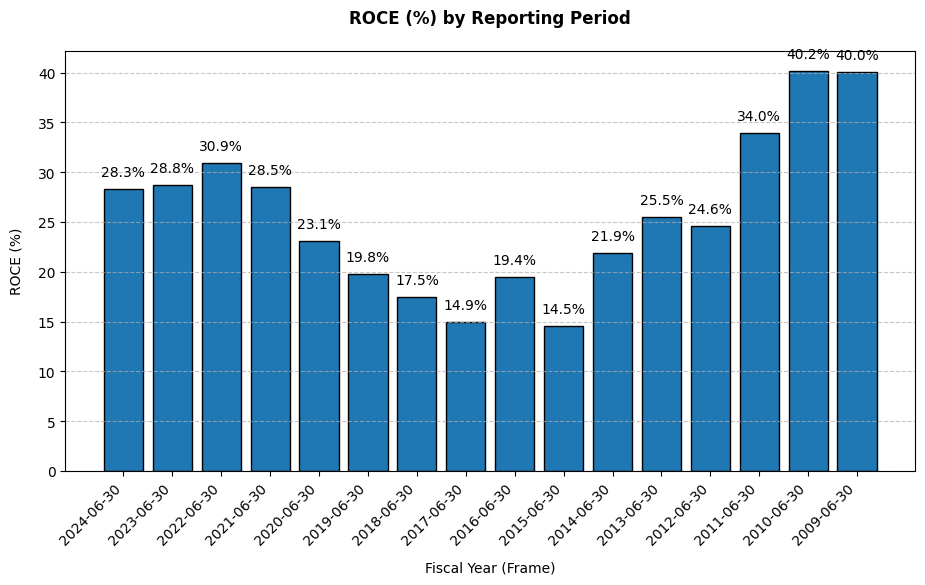

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(roce_df["fy"], roce_df["ROCE (%)"], color="#1f77b4", edgecolor="black")

# Customize plot
plt.title("ROCE (%) by Reporting Period", fontweight="bold", pad=20)
plt.xlabel("Fiscal Year (Frame)", labelpad=10)
plt.ylabel("ROCE (%)", labelpad=10)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    offset = 1 if height >= 0 else -3  # Adjust for negative values
    plt.text(bar.get_x() + bar.get_width() / 2, height + offset, 
             f"{height:.1f}%", ha="center", va="bottom")

# Manually adjust margins instead of tight_layout()
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.95)
plt.show()

## Return on Investment Capital (ROIC)


In [32]:
# Extract data
def get_latest_data(concept):
    df = pd.DataFrame(company_facts["facts"]["us-gaap"][concept]["units"]["USD"])
    df["filed"] = pd.to_datetime(df["filed"])
    df = df.drop(columns="fy").rename(columns={"end": "fy"})
    # Keep only most recent 10-K per Fiscal Year
    df = df[df["form"] == "10-K"].sort_values("filed", ascending=False).drop_duplicates("fy", keep="first")
    return df[["fy", "val"]]
    
ebit_df = get_latest_data("OperatingIncomeLoss").rename(columns={"val": "EBIT"})
tax_df = get_latest_data("IncomeTaxExpenseBenefit").rename(columns={"val": "Tax"})
assets_df = get_latest_data("Assets").rename(columns={"val": "TotalAssets"})
liabilities_df = get_latest_data("LiabilitiesCurrent").rename(columns={"val": "CurrentLiabilities"})
cash_df = get_latest_data("CashAndCashEquivalentsAtCarryingValue").rename(columns={"val": "Cash"})

In [33]:
# Merge DataFrames
merged_df = pd.merge(ebit_df, tax_df, on=["fy"])
merged_df = pd.merge(merged_df, assets_df, on=["fy"])
merged_df = pd.merge(merged_df, liabilities_df, on=["fy"])
merged_df = pd.merge(merged_df, cash_df, on=["fy"])

# Calculate NOPAT (simplified: EBIT * (1 - TaxRate))
merged_df["TaxRate"] = merged_df["Tax"] / merged_df["EBIT"].abs()  # Handle negative EBIT
merged_df["NOPAT"] = merged_df["EBIT"] * (1 - merged_df["TaxRate"].clip(0, 0.3))  # Cap tax rate at 30%

# Calculate Invested Capital (Total Assets - Current Liabilities - Excess Cash)
merged_df["InvestedCapital"] = merged_df["TotalAssets"] - merged_df["CurrentLiabilities"] - merged_df["Cash"]

# Compute ROIC
merged_df["ROIC"] = (merged_df["NOPAT"] / merged_df["InvestedCapital"])
merged_df["ROIC (%)"] = (merged_df["NOPAT"] / merged_df["InvestedCapital"]) * 100

# Final DataFrame
roic_df = merged_df[["fy", "EBIT", "TaxRate", "NOPAT", "InvestedCapital", "ROIC", "ROIC (%)"]].copy()
display(roic_df)

,fy,EBIT,TaxRate,NOPAT,InvestedCapital,ROIC,ROIC (%)
0,2024-06-30,109433000000,0.179571,8.978200e+10,368562000000,0.243601,24.360081
1,2023-06-30,88523000000,0.191476,7.157300e+10,273123000000,0.262054,26.205409
2,2022-06-30,83383000000,0.131658,7.240500e+10,255827000000,0.283023,28.302329
3,2021-06-30,69916000000,0.140612,6.008500e+10,230898000000,0.260223,26.022313
4,2020-06-30,52959000000,0.165317,4.420400e+10,215425000000,0.205194,20.519438
5,2019-06-30,42959000000,0.103541,3.851100e+10,205780000000,0.187146,18.714647
6,2018-06-30,35058000000,0.567716,2.454060e+10,188414000000,0.130248,13.024828
7,2017-06-30,29025000000,0.152007,2.461300e+10,186904000000,0.131688,13.168793
8,2016-06-30,26078000000,0.195567,2.097800e+10,127601000000,0.164403,16.440310
9,2015-06-30,18161000000,0.347668,1.271270e+10,119230000000,0.106623,10.662333


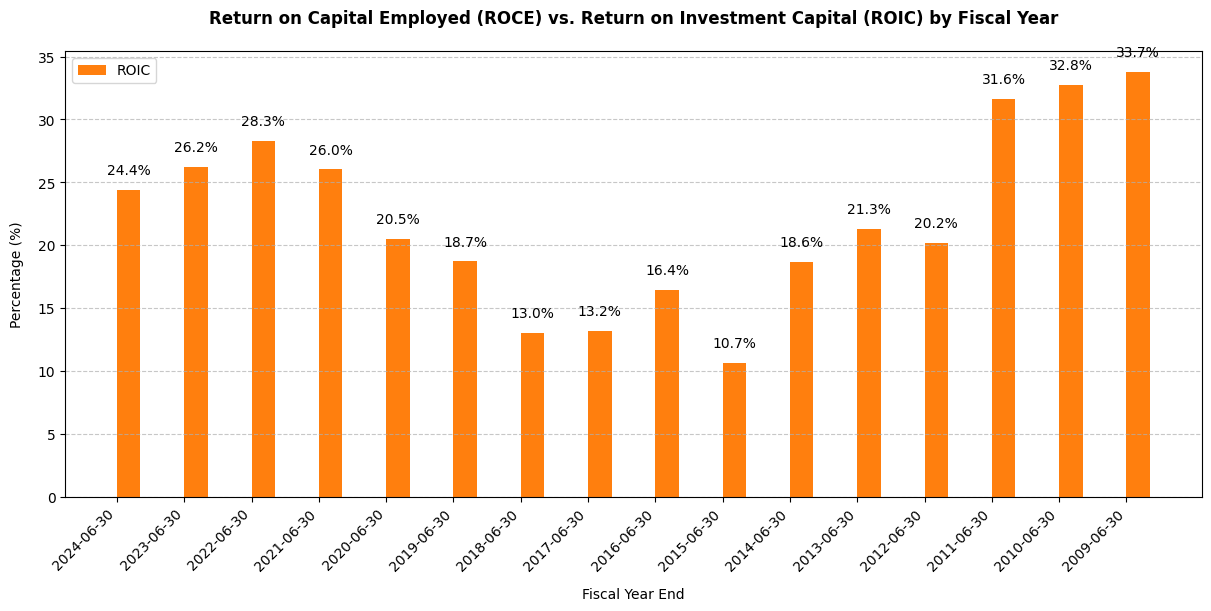

In [34]:
import matplotlib.pyplot as plt
import numpy as np

comparison_df = pd.merge(
    roce_df[["fy", "ROCE (%)"]], 
    roic_df[["fy", "ROIC (%)"]], 
    on=["fy"]
)

# Set up the figure
plt.figure(figsize=(12, 6), constrained_layout=True)
bar_width = 0.35
x = np.arange(len(comparison_df["fy"]))  # X-axis positions

# Plot bars
# roce_bars = plt.bar(x - bar_width/2, comparison_df["ROCE (%)"], 
#                     width=bar_width, color="#1f77b4", label="ROCE")
roic_bars = plt.bar(x + bar_width/2, comparison_df["ROIC (%)"], 
                    width=bar_width, color="#ff7f0e", label="ROIC")

# Customize
plt.title("Return on Capital Employed (ROCE) vs. Return on Investment Capital (ROIC) by Fiscal Year", fontweight="bold", pad=20)
plt.xlabel("Fiscal Year End", labelpad=10)
plt.ylabel("Percentage (%)", labelpad=10)
plt.xticks(x, comparison_df["fy"], rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        offset = 1 if height >= 0 else -3
        plt.text(bar.get_x() + bar.get_width()/2, height + offset, 
                f"{height:.1f}%", ha="center", va="bottom")

# add_labels(roce_bars)
add_labels(roic_bars)

plt.show()

In [35]:
# Calculate YoY growth (% change)
# roic_df.sort_values("fy", ascending=True, inplace=True)
roic_df["ROIC YoY Growth (%)"] = roic_df["ROIC"].pct_change() * 100

# Optional: Round decimals
roic_df["ROIC YoY Growth (%)"] = roic_df["ROIC YoY Growth (%)"].round(1)

# roce_df.sort_values("fy", ascending=True, inplace=True)
roce_df["ROCE YoY Growth (%)"] = roce_df["ROCE"].pct_change() * 100
roce_df["ROCE YoY Growth (%)"] = roce_df["ROCE YoY Growth (%)"].round(1)

performance_df = pd.merge(roic_df, roce_df, on="fy")
performance_df = performance_df.iloc[1:]  # Drop initial year
performance_df = performance_df.iloc[-10:]
# performance_df.sort_values("fy", ascending=False, inplace=True)

performance_df = performance_df[["fy", "ROIC", "ROIC YoY Growth (%)", "ROCE", "ROCE YoY Growth (%)", ]]
performance_df

,fy,ROIC,ROIC YoY Growth (%),ROCE,ROCE YoY Growth (%)
6,2018-06-30,0.130248,-30.4,0.174975,-11.6
7,2017-06-30,0.131688,1.1,0.149177,-14.7
8,2016-06-30,0.164403,24.8,0.194451,30.3
9,2015-06-30,0.106623,-35.1,0.145492,-25.2
10,2014-06-30,0.186409,74.8,0.218990,50.5
11,2013-06-30,0.213171,14.4,0.254861,16.4
12,2012-06-30,0.201776,-5.3,0.245679,-3.6
13,2011-06-30,0.316268,56.7,0.339810,38.3
14,2010-06-30,0.327666,3.6,0.401861,18.3
15,2009-06-30,0.337465,3.0,0.400421,-0.4


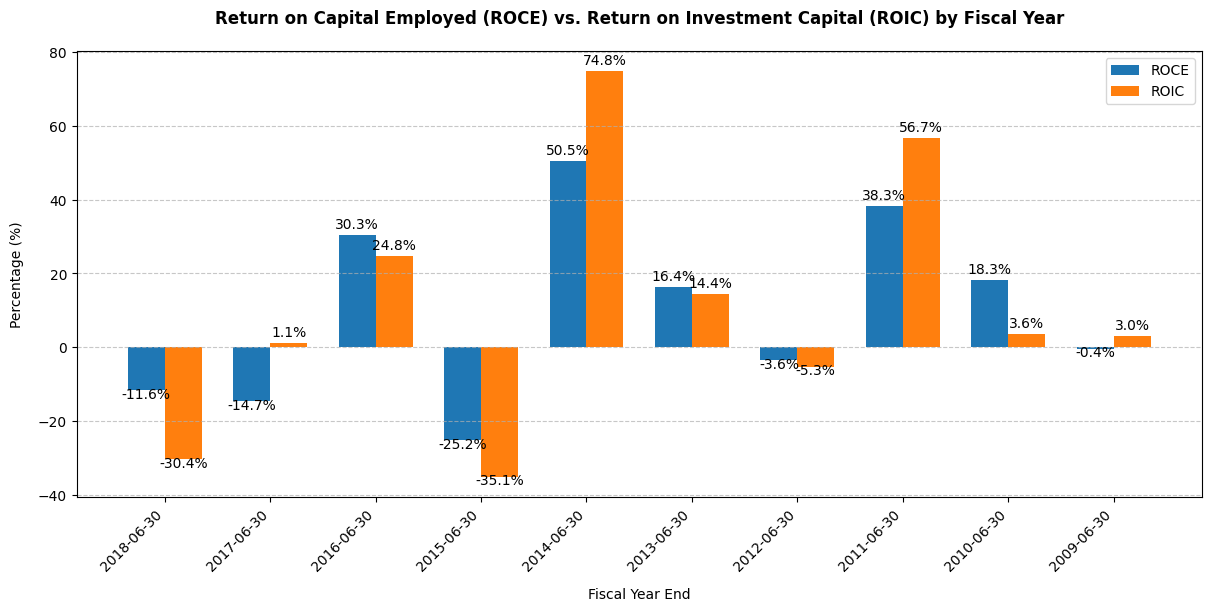

In [36]:
import matplotlib.pyplot as plt
import numpy as np

comparison_df = performance_df

# Set up the figure
plt.figure(figsize=(12, 6), constrained_layout=True)
bar_width = 0.35
x = np.arange(len(comparison_df["fy"]))  # X-axis positions

# Plot bars
roce_bars = plt.bar(x - bar_width/2, comparison_df["ROCE YoY Growth (%)"], 
                    width=bar_width, color="#1f77b4", label="ROCE")
roic_bars = plt.bar(x + bar_width/2, comparison_df["ROIC YoY Growth (%)"], 
                    width=bar_width, color="#ff7f0e", label="ROIC")

# Customize
plt.title("Return on Capital Employed (ROCE) vs. Return on Investment Capital (ROIC) by Fiscal Year", fontweight="bold", pad=20)
plt.xlabel("Fiscal Year End", labelpad=10)
plt.ylabel("Percentage (%)", labelpad=10)
plt.xticks(x, comparison_df["fy"], rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Add value labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        offset = 1 if height >= 0 else -3
        plt.text(bar.get_x() + bar.get_width()/2, height + offset, 
                f"{height:.1f}%", ha="center", va="bottom")

add_labels(roce_bars)
add_labels(roic_bars)

plt.show()

In [37]:
import pandas as pd

def get_financial_metrics(company_facts):
    # Helper function to safely get data
    def safe_get(concept, default=None, unit="USD", renameto=None):
        try:
            df = pd.DataFrame(company_facts["facts"]["us-gaap"][concept]["units"][unit])
            df["filed"] = pd.to_datetime(df["filed"])
            df = df[df["form"] == "10-K"].sort_values("filed", ascending=False)
            df.drop_duplicates("end", keep="first", inplace=True)
            df.drop_duplicates("fy", keep="first", inplace=True)
            # df.drop_duplicates("fy_", keep="first", inplace=True)
            df.sort_values("end", ascending=True, inplace=True)
            df["growth"] = df["val"].pct_change() * 100
            df["fy_"] = df["end"].str[:4]
            df = df[["fy", "val", "growth"]]
            if renameto:
                df.rename(columns={"val": renameto}, inplace=True)
                df.rename(columns={"growth": f"{renameto} Growth"}, inplace=True)
            return df
        except KeyError:
            if default is not None:
                return default
            raise

    # Find available revenue tag
    revenue_tags = [
        "RevenueFromContractWithCustomerExcludingAssessedTax",
        "RevenueFromContractWithCustomer",
        "SalesRevenueNet",
        "Revenues",
        "Revenue"
    ]
    revenue_tag = next((tag for tag in revenue_tags 
                      if tag in company_facts["facts"]["us-gaap"]), None)
    
    if not revenue_tag:
        raise KeyError("No valid revenue tag found in API response")

    # Extract metrics with fallbacks
    metrics = {
        "OperatingIncome": safe_get("OperatingIncomeLoss", renameto="OperatingIncome"),
        "Tax": safe_get("IncomeTaxExpenseBenefit", renameto="Tax"),
        "Assets": safe_get("Assets", renameto="Assets"),
        "CurrentLiabilities": safe_get("LiabilitiesCurrent", renameto="CurrentLiabilities"),
        "Sales": safe_get(revenue_tag, renameto="Sales"),
        "EPS": safe_get("EarningsPerShareDiluted", 
                       safe_get("EarningsPerShareBasic", unit="USD/shares"), unit="USD/shares", renameto="EPS"),
        "Equity": safe_get("StockholdersEquity", renameto="Equity"),
        "Cash": safe_get("CashAndCashEquivalentsAtCarryingValue", renameto="Cash")
    }
        
    financial_df = pd.concat(
        [df.set_index(["fy"]) for df in metrics.values() if df is not None],
        axis=1
    ).reset_index()
    
    display(financial_df)

    # financial_df = financial_df.iloc[:-10]
    financial_df = financial_df[ financial_df["fy"] > 2013].sort_values("fy")

    # Calculate ROIC if we have the required components
    if all(col in financial_df.columns for col in ["OperatingIncome", "Tax", "Assets", "CurrentLiabilities", "Cash"]):
        financial_df["NOPAT"] = financial_df["OperatingIncome"] * (1.0 - (financial_df["Tax"] / financial_df["OperatingIncome"].abs().replace(0, 1)))
        financial_df["InvestedCapital"] = (
            financial_df["Assets"] - financial_df["CurrentLiabilities"] - financial_df["Cash"])
        financial_df["ROIC"] = (financial_df["NOPAT"] / financial_df["InvestedCapital"]) * 100

    # Select and reorder columns
    available_cols = ["end", "ROIC", "Sales", "EPS", "Equity", "Cash"]
    final_cols = [col for col in available_cols if col in financial_df.columns]
    display(financial_df)
    return financial_df[final_cols].round(2)

financials_df = get_financial_metrics(company_facts)
print(financials_df)


,fy,OperatingIncome,OperatingIncome Growth,Tax,Tax Growth,Assets,Assets Growth,CurrentLiabilities,CurrentLiabilities Growth,Sales,Sales Growth,EPS,EPS Growth,Equity,Equity Growth,Cash,Cash Growth
0,2010.0,22271000000,NaN,6133000000,NaN,77888000000,NaN,27034000000,NaN,NaN,NaN,0.47,NaN,36286000000,NaN,6111000000,NaN
1,2011.0,20363000000,-8.567195,5252000000,-14.364911,86113000000,10.560035,26147000000,-3.281053,NaN,NaN,0.40,-14.893617,39558000000,9.017252,10339000000,69.186712
2,2012.0,24098000000,18.342091,6253000000,19.059406,108704000000,26.234134,28774000000,10.047042,NaN,NaN,0.61,52.500000,46175000000,16.727337,6076000000,-41.232227
3,2013.0,27161000000,12.710598,4921000000,-21.301775,121271000000,11.560752,32688000000,13.602558,NaN,NaN,0.60,-1.639344,57083000000,23.623173,5505000000,-9.397630
4,2014.0,21763000000,-19.874084,5289000000,7.478155,142431000000,17.448524,37417000000,14.467083,NaN,NaN,0.72,20.000000,66363000000,16.257029,9610000000,74.568574
5,2015.0,26764000000,22.979369,5189000000,-1.890717,172384000000,21.029832,45625000000,21.936553,NaN,NaN,0.68,-5.555556,78944000000,18.957853,6938000000,-27.804370
6,2016.0,27759000000,3.717680,5746000000,10.734246,174472000000,1.211249,49647000000,8.815342,NaN,NaN,2.63,286.764706,89784000000,13.731253,3804000000,-45.171519
7,2017.0,5283000000,-80.968335,6314000000,9.885137,193468000000,10.887707,59357000000,19.558080,NaN,NaN,0.61,-76.806084,80083000000,-10.804820,8669000000,127.891693
8,2018.0,26078000000,393.621049,5100000000,-19.227114,250312000000,29.381603,55745000000,-6.085213,2.192800e+10,NaN,2.56,319.672131,83090000000,3.754854,5595000000,-35.459684
9,2019.0,7708000000,-70.442519,4412000000,-13.490196,258848000000,3.410144,58488000000,4.920621,9.657100e+10,340.400401,3.25,26.953125,87711000000,5.561439,11946000000,113.512064


,fy,OperatingIncome,OperatingIncome Growth,Tax,Tax Growth,Assets,Assets Growth,CurrentLiabilities,CurrentLiabilities Growth,Sales,Sales Growth,EPS,EPS Growth,Equity,Equity Growth,Cash,Cash Growth,NOPAT,InvestedCapital,ROIC
4,2014.0,21763000000,-19.874084,5289000000,7.478155,142431000000,17.448524,37417000000,14.467083,NaN,NaN,0.72,20.000000,66363000000,16.257029,9610000000,74.568574,1.647400e+10,95404000000,17.267620
5,2015.0,26764000000,22.979369,5189000000,-1.890717,172384000000,21.029832,45625000000,21.936553,NaN,NaN,0.68,-5.555556,78944000000,18.957853,6938000000,-27.804370,2.157500e+10,119821000000,18.006026
6,2016.0,27759000000,3.717680,5746000000,10.734246,174472000000,1.211249,49647000000,8.815342,NaN,NaN,2.63,286.764706,89784000000,13.731253,3804000000,-45.171519,2.201300e+10,121021000000,18.189405
7,2017.0,5283000000,-80.968335,6314000000,9.885137,193468000000,10.887707,59357000000,19.558080,NaN,NaN,0.61,-76.806084,80083000000,-10.804820,8669000000,127.891693,-1.031000e+09,125442000000,-0.821894
8,2018.0,26078000000,393.621049,5100000000,-19.227114,250312000000,29.381603,55745000000,-6.085213,2.192800e+10,NaN,2.56,319.672131,83090000000,3.754854,5595000000,-35.459684,2.097800e+10,188972000000,11.101116
9,2019.0,7708000000,-70.442519,4412000000,-13.490196,258848000000,3.410144,58488000000,4.920621,9.657100e+10,340.400401,3.25,26.953125,87711000000,5.561439,11946000000,113.512064,3.296000e+09,188414000000,1.749339
10,2020.0,35058000000,354.826155,19903000000,351.110607,286556000000,10.704352,69420000000,18.691014,3.502100e+10,-72.170880,1.14,-64.923077,82718000000,-5.692559,11356000000,-4.938892,1.515500e+10,205780000000,7.364661
11,2021.0,42959000000,22.536939,4448000000,-77.651610,301311000000,5.149081,72310000000,4.163065,1.258430e+11,30.311377,5.06,343.859649,102330000000,23.709471,13576000000,19.549137,3.851100e+10,215425000000,17.876755
12,2022.0,52959000000,23.278009,8755000000,96.830036,333779000000,10.775577,88657000000,22.606832,1.430150e+11,308.369264,5.76,13.833992,118304000000,15.610280,14224000000,4.773129,4.420400e+10,230898000000,19.144384
13,2023.0,69916000000,32.019109,9831000000,12.290120,364840000000,9.305858,95082000000,7.247031,1.680880e+11,17.531727,8.05,39.756944,141988000000,20.019610,13931000000,-2.059899,6.008500e+10,255827000000,23.486575


     ROIC         Sales    EPS        Equity         Cash
4   17.27           NaN   0.72   66363000000   9610000000
5   18.01           NaN   0.68   78944000000   6938000000
6   18.19           NaN   2.63   89784000000   3804000000
7   -0.82           NaN   0.61   80083000000   8669000000
8   11.10  2.192800e+10   2.56   83090000000   5595000000
9    1.75  9.657100e+10   3.25   87711000000  11946000000
10   7.36  3.502100e+10   1.14   82718000000  11356000000
11  17.88  1.258430e+11   5.06  102330000000  13576000000
12  19.14  1.430150e+11   5.76  118304000000  14224000000
13  23.49  1.680880e+11   8.05  141988000000  13931000000
14  24.36  2.451220e+11  11.80  268477000000  18315000000


In [38]:
#
company_facts["facts"]["us-gaap"].keys()

dict_keys(['AccountsPayableCurrent', 'AccountsReceivableNet', 'AccountsReceivableNetCurrent', 'AccountsReceivableNetNoncurrent', 'AccruedIncomeTaxesCurrent', 'AccruedIncomeTaxesNoncurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AcquiredFiniteLivedIntangibleAssetAmount', 'AcquiredFiniteLivedIntangibleAssetWeightedAverageUsefulLife', 'AdvertisingExpense', 'AllocatedShareBasedCompensationExpense', 'AllowanceForDoubtfulAccountsReceivableCurrent', 'AmortizationOfIntangibleAssets', 'AntidilutiveSecuritiesExcludedFromComputationOfEarningsPerShareAmount', 'AssetImpairmentCharges', 'Assets', 'AssetsCurrent', 'AssetsFairValueDisclosu

## Getting one fact from requested period/frame

* data.sec.gov/api/xbrl/frames/

In [39]:
# Let's retrieve all data about current assets in Q4 of 2021
fact = "AssetsCurrent"
year = 2021
quarter = "Q1I"

url = f"https://data.sec.gov/api/xbrl/frames/us-gaap/{fact}/USD/CY{year}{quarter}.json"
url

'https://data.sec.gov/api/xbrl/frames/us-gaap/AssetsCurrent/USD/CY2021Q1I.json'

In [40]:
curr_assets_dict = requests.get(url, headers=header).json()
curr_assets_dict.keys()

dict_keys(['taxonomy', 'tag', 'ccp', 'uom', 'label', 'description', 'pts', 'data'])

In [41]:
# let's convert all data of requested period to pandas dataframe
curr_assets_df = pd.DataFrame(curr_assets_dict["data"])
curr_assets_df = curr_assets_df.sort_values("val", ascending=False)
curr_assets_df = curr_assets_df[curr_assets_df["val"] != 0]
curr_assets_df

,accn,cik,entityName,loc,end,val
3625,0001652044-21-000020,1652044,Alphabet Inc.,US-CA,2021-03-31,172137000000
705,0001564590-21-020891,789019,Microsoft Corporation,US-WA,2021-03-31,165614000000
1848,0001156375-21-000052,1156375,CME GROUP INC.,US-IL,2021-03-31,126745500000
486,0000320193-21-000056,320193,Apple Inc.,US-CA,2021-03-27,121465000000
1349,0001018724-21-000010,1018724,"AMAZON.COM, INC.",US-WA,2021-03-31,121408000000
...,...,...,...,...,...,...
2538,0001477932-21-003127,1418115,"HEALTHCARE SOLUTIONS MANAGEMENT GROUP, INC.",US-NY,2021-03-31,121
2246,0001262463-21-000134,1350156,PREAXIA HEALTH CARE PAYMENT SYSTEMS INC.,CA-AB,2021-02-28,118
3786,0001607062-21-000335,1683131,FORZA INNOVATIONS INC.,CA-AB,2021-03-31,76
4278,0001640334-21-001390,1786119,"Excellerant, Inc.",BE-,2021-03-31,48
